In [1]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp

pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
import nltk

In [4]:
#import numpy as np 
#from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

# keep coverage of data

In [ ]:
cumulated_time_spend=data.groupby(["user_id","app_code"]).agg({'time_spend':'sum'})['time_spend'].groupby('user_id', group_keys=False).apply(lambda x: x.sort_values(ascending=False).cumsum()).reset_index()

In [ ]:
total_time_spend=data.groupby('user_id').time_spend.sum()

In [ ]:
cumulated_time_spend=cumulated_time_spend.join(total_time_spend,on='user_id',rsuffix="_total")

In [ ]:
cumulated_time_spend['coverage']=cumulated_time_spend.time_spend/cumulated_time_spend.time_spend_total

In [ ]:
cumulated_time_spend=cumulated_time_spend[cumulated_time_spend.coverage.shift(1)<=0.70]

In [ ]:
data_coverage=data.merge(cumulated_time_spend,how='inner',on=['user_id','app_code'])

As a sanity check we take a look at how many apps are left for the each user after the apps were removed.

In [ ]:
(data_coverage.groupby('user_id').app_code.nunique()==1).sum()

In [ ]:
data_coverage.groupby('user_id').app_code.nunique()[data_coverage.groupby('user_id').app_code.nunique()<5]

In [ ]:
print("Number of observation after removing apps:",data_coverage.shape[0])
print("Number of different apps left:",data_coverage.app_code.nunique())

Initially this results in 11 users only having 1 app left and 3469 users having less than 10 different apps. Therefore the coverage is increased form 90% to 95%. Here 1015 users have less than 10 different apps. for 99% 89 users have less than 10 apps. Only 7 have less than 5 and only one user has three apps, and no user has less than 3 different apps.

## update session length

In [ ]:
data_coverage=data_coverage.merge(data_coverage.groupby(['user_id','session'])\
                                  .agg({'app_code':'size'})\
                                  .rename(columns={'app_code':'session_length'})\
                                  .reset_index(),on=['user_id','session'])

We are now ready to find the number of observations.

In [ ]:
input_string=data_coverage[data_coverage.session_length>1].groupby(['user_id','session'])['app_code'].apply(list).apply(lambda l: ' -1 '.join([str(i) for i in l])+" -1 -2")

In [ ]:
input_string.to_csv("input_string_70_coverage.csv",index='False')

In [ ]:
input_string=pd.read_csv("input_string_70_coverage.csv")

In [ ]:
input_string=input_string.drop(['user_id','session'],axis=1)

In [ ]:
dfAsString = input_string.to_string(header=False, index=False).lstrip()

In [ ]:
dfAsString=re.sub(r'\n\s+','\n',dfAsString)

In [ ]:
#update file name
f = open(os.path.join(os.getcwd(), '293sec_sessions_70_coverage_without_length_1.txt'), 'w')
f.write(dfAsString)
f.close()

In [ ]:
spmf = Spmf("VMSP", input_filename="/home/s165317/motifs_and_competition_in_app_usage/293sec_sessions_70_coverage_without_length_1.txt",
            output_filename="/home/s165317/motifs_and_competition_in_app_usage/output_VMSP_293sec_sessions_70_coverage_without_length_1_min_sup_0_75.txt",
            spmf_bin_location_dir="/home/s165317/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_293sec_sessions_70_coverage_without_length_1_min_sup_0_75.csv")

In [ ]:
app_dict=dict(zip(data.app_code, data.package_name))

In [ ]:
output=pd.read_csv("output_VMSP_293sec_sessions_70_coverage_without_length_1_min_sup_0_75.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_293sec_sessions_70_coverage_without_length_1_min_sup_0_75.csv",index=False)

In [ ]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

In [ ]:
output

Before repeating apps where seen in a lot of the frequent patterns, as there repeating apps has reoccured after the apps have been removed by coverage. Therefore repeating apps are merged again.

In [11]:
data_70=pd.read_csv("70_coverage_merged.csv")

In [12]:
data_70=data_70[data_70.session_length>1]

In [13]:
input_string=data_70.groupby(['user_id','session'])['app_code'].apply(list).apply(lambda l: ' -1 '.join([str(i) for i in l])+" -1 -2")

In [14]:
input_string.to_csv("input_string_70_merge.csv",index='False')

OSError: [Errno 28] No space left on device

In [ ]:
input_string=pd.read_csv("input_string_70_merge.csv")

In [ ]:
input_string=input_string.drop(['user_id','session'],axis=1)

In [ ]:
dfAsString = input_string.to_string(header=False, index=False).lstrip()

In [ ]:
dfAsString=re.sub(r'\n\s+','\n',dfAsString)

In [ ]:
#update file name
f = open(os.path.join(os.getcwd(), '293sec_sessions_70_coverage__merge_without_length_1.txt'), 'w')
f.write(dfAsString)
f.close()

In [ ]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/293sec_sessions_70_coverage__merge_without_length_1.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_293sec_sessions_70_coverage__merge_without_length_1_min_sup_0_75.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_293sec_sessions_70_coverage__merge_without_length_1_min_sup_0_75.csv")

With the overall perspective and the low coverage it is not suprising that it are the well known apps that we see here. it also turns out that we end up with a lot of repeating apps.Since repaeting apps were merged apps were removed based on coverage. It indicates that for instane com.google.android.youtube -> x -> com.google.android.youtube is a common pattern. It is also clear to se that apps where you spend a lot of time are generally favoured. For instance the most common pattern is youtube->youtube which is an app were people could be expected to use more time.

In [ ]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_test.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_test.csv")

With the time coverage a lot more observations need to be removed. Therefore we will instead try to use the coverage of the observations so as to for instance keep 90% of the users observations.
This does however have the disadvantage that we risk more scars observations within a session after they are removed.

In [ ]:
app_occurences=data.groupby(["user_id","app_code"]).agg({'package_name':'size'})['package_name'].groupby('user_id', group_keys=False).apply(lambda x: x.sort_values(ascending=False).cumsum()).reset_index()

In [ ]:
total_apps=data.groupby('user_id').package_name.size()

In [ ]:
app_occurences=app_occurences.join(total_apps,on='user_id',rsuffix="_total")

In [ ]:
app_occurences['coverage']=app_occurences.package_name/app_occurences.package_name_total

In [ ]:
app_occurences=app_occurences[app_occurences.coverage.shift(1)<=0.75]

In [ ]:
data_coverage=data.merge(app_occurences,how='inner',on=['user_id','app_code'])

In [ ]:
(data_coverage.groupby('user_id').app_code.nunique()==1).sum()

In [ ]:
print("Number of observation after removing apps:",data_coverage.shape[0])
print("Number of different apps left:",data_coverage.app_code.nunique())

In [ ]:
data_coverage=data_coverage.merge(data_coverage.groupby(['user_id','session']).agg({'app_code':'size'}).rename(columns={'app_code':'session_length'}).reset_index(),on=['user_id','session'])

In [ ]:
input_string=data_coverage[data_coverage.session_length>1].groupby(['user_id','session'])['app_code'].apply(list).apply(lambda l: ' -1 '.join([str(i) for i in l])+" -1 -2")

In [ ]:
input_string.to_csv("input_string_75_observation_coverage.csv",index='False')

In [ ]:
input_string=pd.read_csv("input_string_75_observation_coverage.csv")

In [ ]:
input_string=input_string.drop(['user_id','session'],axis=1)

In [ ]:
dfAsString = input_string.to_string(header=False, index=False).lstrip()

In [ ]:
dfAsString=re.sub(r'\n\s+','\n',dfAsString)

In [ ]:
#update file name
f = open(os.path.join(os.getcwd(), '293sec_sessions_75_observation_coverage_without_length_1.txt'), 'w')
f.write(dfAsString)
f.close()

In [ ]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/293sec_sessions_75_observation_coverage_without_length_1.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_293sec_sessions_75_observation_coverage_without_length_1_min_sup_0_75.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_293sec_sessions_75_observation_coverage_without_length_1_min_sup_0_75.csv")

## Transition Matrix

### Stragety of creating transition matrix
   1. Counting the elements we need for probabilities   
   2. how many times the frequent apps occur  (data $a1$.app1 count)\n   Done
   3. how many apps $b1$ after the frequent app $a1$ we just count as $T_a1$ where number of $b1 = \sum \{a1,...,a25\}$\n
   4. Count the percentage $\frac{a1}{b1},...\frac{a25}{b1}$\n
   5. make them into dataframe

In [2]:
output = pd.read_csv('output_VMSP_293sec_sessions_70_coverage_without_length_1_min_sup_0_75.csv',converters={'pattern':eval})

In [3]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")


In [4]:
data = data.loc[:,['user_id','session','package_name']]

In [5]:
data

,user_id,session,package_name
0,0,0,com.facebook.katana
1,0,0,com.android.chrome
2,0,0,com.google.android.apps.photos
3,0,0,com.facebook.katana
4,0,0,com.whatsapp
...,...,...,...
228760320,9999,5646,com.google.android.googlequicksearchbox
228760321,9999,5646,com.android.chrome
228760322,9999,5646,com.google.android.apps.docs
228760323,9999,5647,com.microsoft.office.outlook


### Counting 

In [6]:
#input_string=data.groupby(['user_id','session'])['app_code'].apply(list)

In [7]:
# 23 frequent apps
frequent_patterns = set(output.pattern.sum())
#frequent_patterns =output.pattern.explode().unique() 

In [8]:
df_frequent_patterns_count = data[data.package_name.apply(lambda l : l in frequent_patterns)].groupby('package_name')\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'count'})

In [9]:
df_frequent_patterns_count

,count
package_name,
bbc.mobile.news.uk,1210578
com.android.chrome,19795218
com.android.incallui,3720317
com.ebay.mobile,1354618
com.facebook.katana,31866347
com.facebook.orca,11018252
com.google.android.apps.maps,3673655
com.google.android.apps.messaging,1103285
com.google.android.gm,5717767


#### Counting step2

In [10]:
data['next_app'] = data.groupby(['user_id','session']).package_name.shift(-1)

In [11]:
df_next_apps_count=data[data.package_name.apply(lambda l : l in frequent_patterns)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [12]:
df_next_apps_count

next_count
package_name                         next_app                              
bbc.mobile.news.uk                   DVBLink.DVBLink                      1
                                     Draziw.Button.Mines                  5
                                     aasuited.net.word                    1
                                     abs.workout.sixparkabs.fit           2
                                     adaan.Gk                             4
...                                                                     ...
com.yahoo.mobile.client.android.mail yes.worldpayzinc                     1
                                     yo.app.free                         92
                                     younow.live                          3
                                     yuk.altibaro                         3
                                     zombie.survival.craft.z             29

[295315 rows x 1 columns]

In [13]:
df_next_apps_sum = df_next_apps_count.reset_index().groupby('package_name').agg({'next_count':'sum'}).rename(columns = {'session':'sum of next app'})

In [16]:
df_next_apps_sum

,next_count
package_name,
bbc.mobile.news.uk,805398
com.android.chrome,13615890
com.android.incallui,2455911
com.ebay.mobile,919941
com.facebook.katana,19469281
com.facebook.orca,7540832
com.google.android.apps.maps,2356651
com.google.android.apps.messaging,689924
com.google.android.gm,4061403


#### Step4

In [17]:
df_numerator = df_next_apps_count[df_next_apps_count.index.get_level_values('next_app').isin(frequent_patterns)].reset_index()

In [18]:
df_transiction = df_numerator.merge(df_next_apps_sum, on='package_name')

In [19]:
df_transiction['probability'] = df_transiction.next_count_x/df_transiction.next_count_y*100

In [20]:
df_transiction.drop(['next_count_x', 'next_count_y'], axis=1, inplace=True)

In [33]:
Transaction_matrix = df_transiction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [34]:
Transaction_matrix=Transaction_matrix.fillna(0)

In [35]:
Transaction_matrix

next_app,bbc.mobile.news.uk,com.android.chrome,com.android.incallui,com.ebay.mobile,com.facebook.katana,com.facebook.orca,com.google.android.apps.maps,com.google.android.apps.messaging,com.google.android.gm,com.google.android.googlequicksearchbox,...,com.nianticlabs.pokemongo,com.snapchat.android,com.sonyericsson.album,com.sonyericsson.android.socialphonebook,com.sonyericsson.conversations,com.sonymobile.email,com.spotify.music,com.twitter.android,com.whatsapp,com.yahoo.mobile.client.android.mail
package_name,,,,,,,,,,,,,,,,,,,,,
bbc.mobile.news.uk,0.000000,12.924666,0.495904,0.577478,12.449497,2.184013,1.418305,0.405265,2.591638,7.577868,...,0.395084,1.565934,1.043583,0.379936,3.437803,2.649249,0.716168,3.112871,8.383805,0.556743
com.android.chrome,0.657849,0.000000,0.851322,1.165175,12.918450,3.842217,2.561566,0.459874,3.561479,14.081092,...,0.427265,1.993223,1.551342,0.759392,4.585304,2.850302,0.832828,3.176245,10.387738,0.926028
com.android.incallui,0.137261,3.402892,0.000000,0.254284,8.358283,2.855967,1.367802,0.091860,1.449075,3.540356,...,0.597579,1.040591,0.824867,36.904228,12.850058,1.553843,0.402539,0.462883,8.749991,0.577830
com.ebay.mobile,0.546231,13.225305,0.769723,0.000000,15.369138,3.273145,1.335412,0.483727,3.434677,9.586702,...,0.333826,1.249754,1.573144,0.586885,4.334191,3.442286,0.395460,1.223557,8.190090,1.258450
com.facebook.katana,0.680225,8.701575,1.061539,0.794703,0.000000,12.681377,1.254001,0.407935,2.448693,6.122522,...,0.656927,4.318829,2.266812,0.724844,6.545373,2.534280,1.005492,2.343779,13.245779,0.885436
com.facebook.orca,0.324195,6.452312,0.934446,0.421001,29.977223,0.000000,1.233683,0.393458,1.932983,4.031240,...,0.587084,5.636102,2.123161,0.941753,5.464291,1.636742,1.386041,1.422111,8.865786,0.442617
com.google.android.apps.maps,0.551503,10.412573,1.638724,0.489254,11.822200,3.971186,0.000000,0.647020,2.854135,8.422206,...,0.786582,2.107779,1.726730,1.261663,5.584662,2.295588,1.644707,1.399656,12.138878,0.606539
com.google.android.apps.messaging,0.584122,8.318163,0.378882,0.645144,14.280269,4.642540,2.315907,0.000000,3.470962,7.295586,...,0.584267,3.664751,1.466538,0.426569,0.026525,2.675367,1.038810,2.335040,10.968020,0.781970
com.google.android.gm,0.766115,17.866757,0.896513,0.976239,14.259998,3.066256,1.759835,0.438026,0.000000,5.908475,...,0.412961,1.472816,1.467522,0.993745,4.431572,1.699093,0.580563,1.788643,8.555664,0.498670


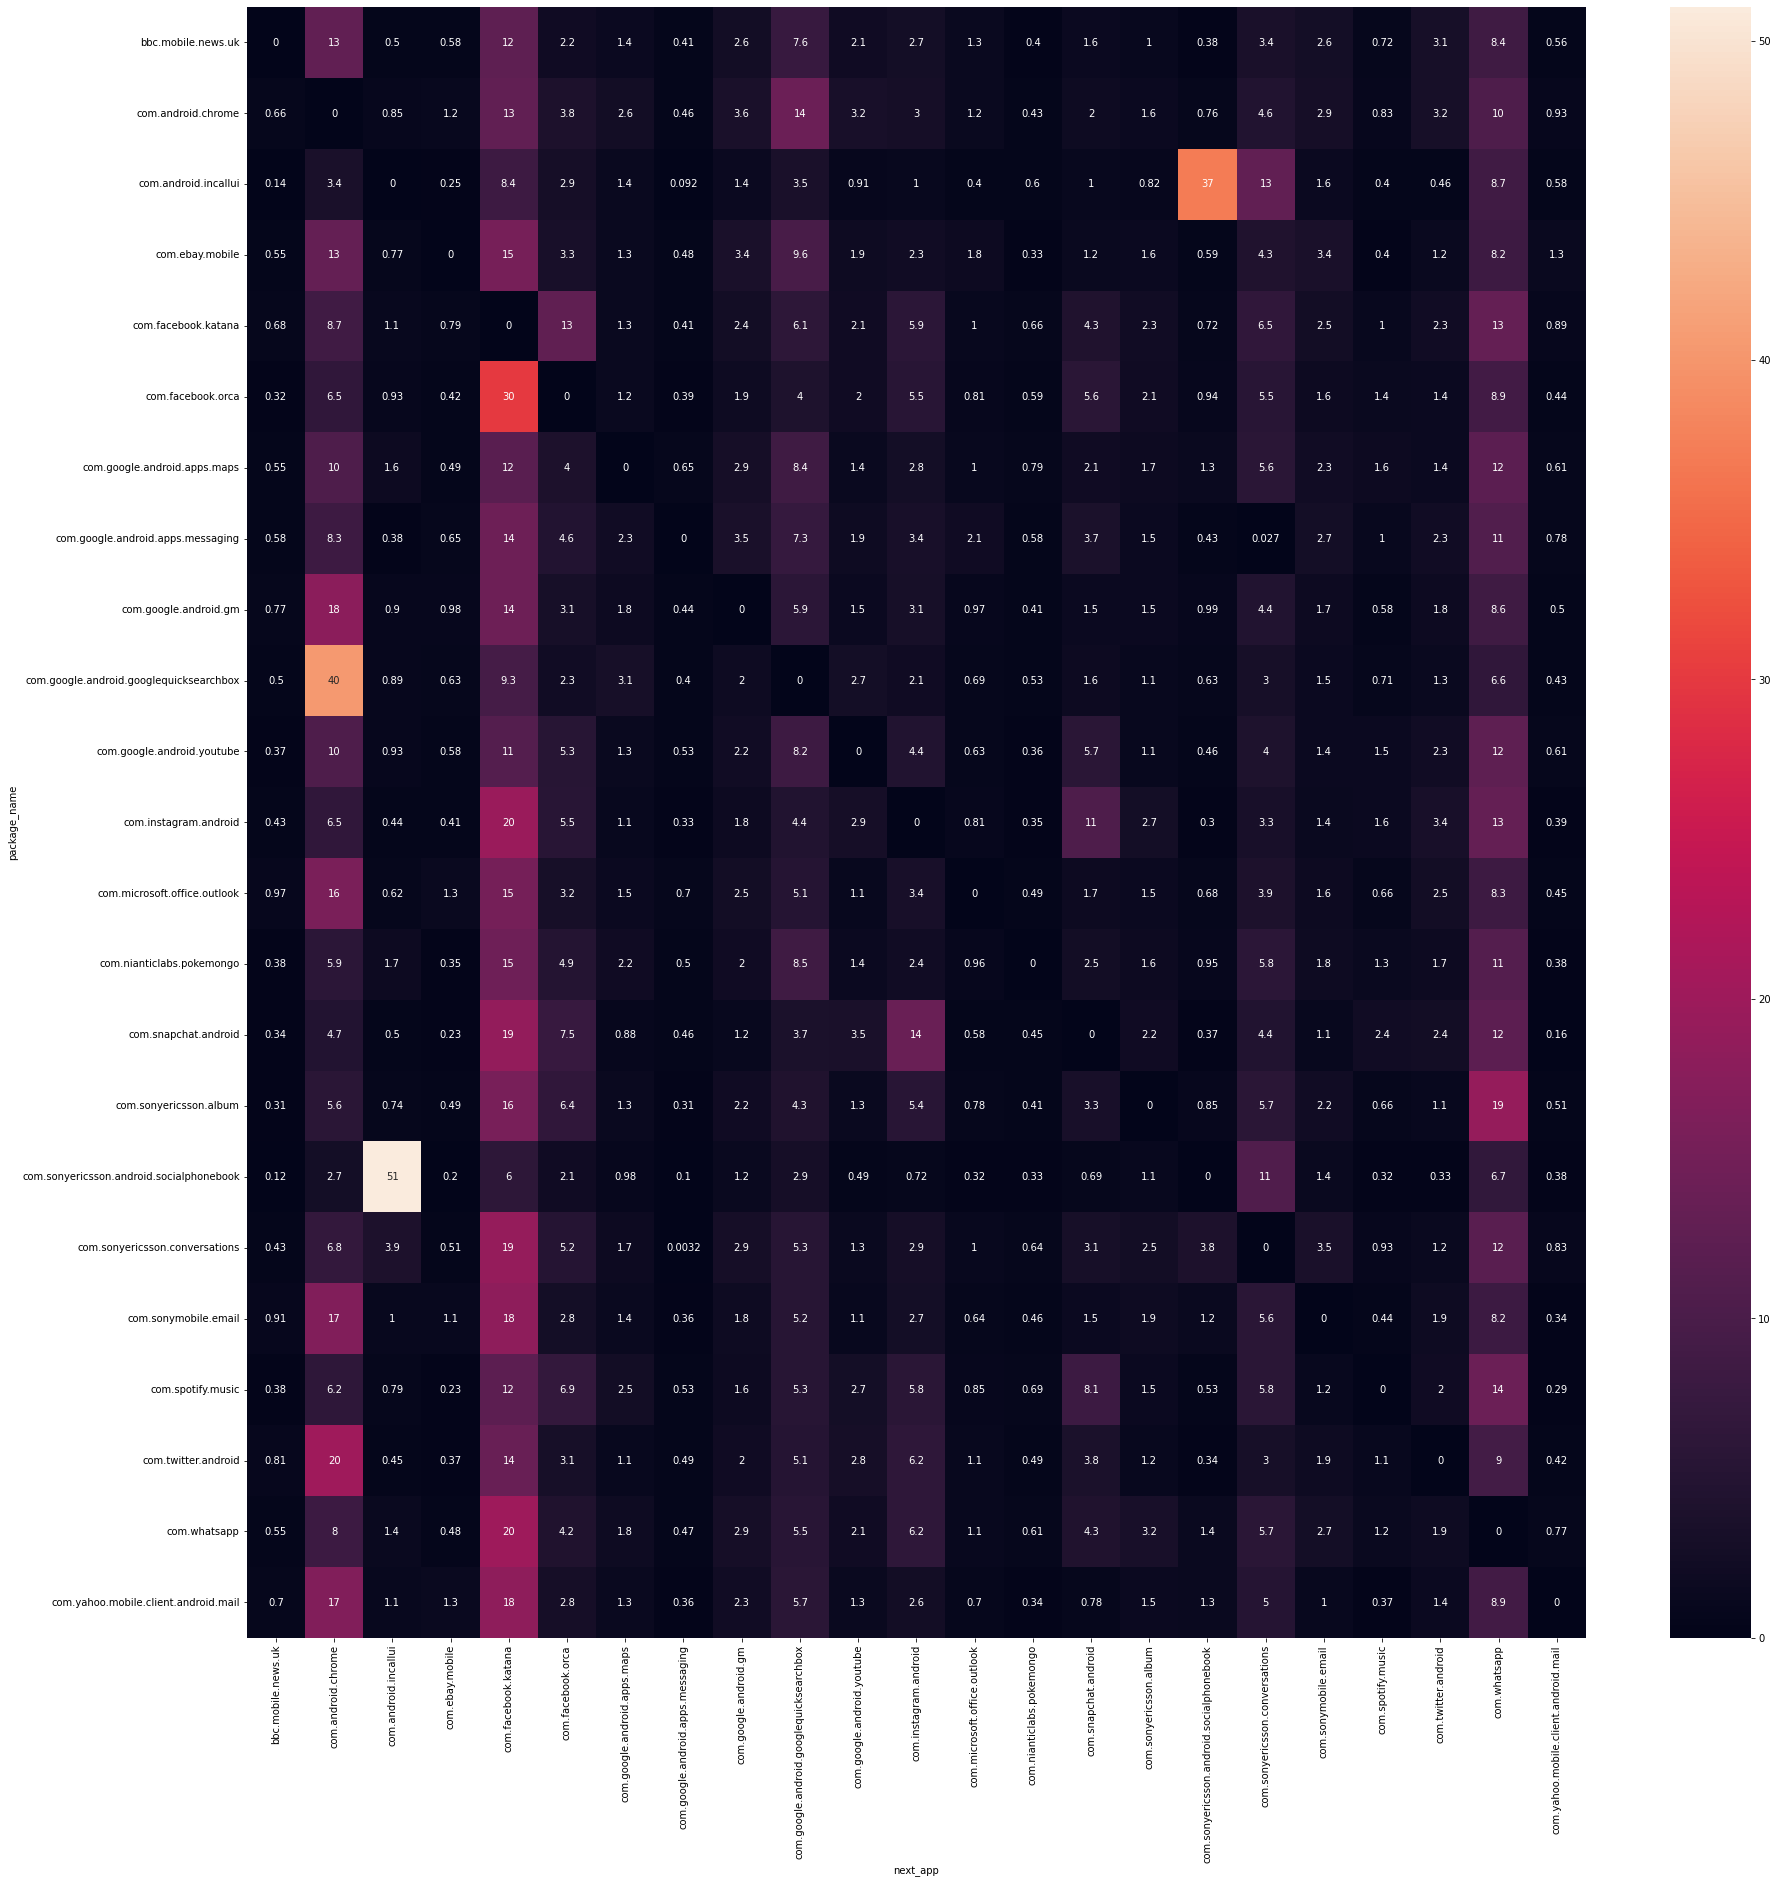

In [43]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(Transaction_matrix, annot=True)
#ax.set_title('Transaction matrix of 23 frequent apps from 70% apps coverage in whole dataset ')